# BOM (movie gross numbers) Datasets Playground


Box Office Mojo dataset includes box office gross values for various movies.

bom.movie_gross.csv has columns:

title, studio, domestic_gross, foreign_gross, year


From Box Office Mojo website we learn the following about the data:


What do "domestic" and "international" mean?
"Domestic" refers to gross box-office revenue from North America (U.S., Canada, and Puerto Rico), unless otherwise noted. "International" covers the rest of the world.


https://help.imdb.com/article/imdbpro/industry-research/box-office-mojo-by-imdbpro-faq/GCWTV4MQKGWRAUAP?ref_=mojo_ftr_help#domesticinternational


In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set up pandas to display floats in a more human friendly way
pd.options.display.float_format = '{:,.2f}'.format

In [265]:
bom_movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000.00",652000000,2010
1,Alice in Wonderland (2010),BV,"334,200,000.00",691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00",664300000,2010
3,Inception,WB,"292,600,000.00",535700000,2010
4,Shrek Forever After,P/DW,"238,700,000.00",513900000,2010


Check for duplicates in the data

In [266]:
bom_dups = bom_movie_gross_df[bom_movie_gross_df.duplicated()]
print(len(bom_dups))

0


In [267]:
print(bom_movie_gross_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


3359 of 3387 records had domestic_gross, 

2037 of 3387 had foreign_gross, 

so only 2037 could be used to create worldwide_gross. 

domestric_gross is already in numeric form. year is an int not a date, might be fine to group by year.

DATA CLEANING - 

title no NAs
year no NaNs

studio 5 had NaNs...replace them with "UNKNOWN" for unknown

foreign_gross is str neeeds to be converted to float


domestic_gross 3359 out of 3387...will select a subset to use

foreign_gross  2037 out of 3387.. will have to subset to use

making a worldwide_gross where there are values for both domestic_gross and foreign_gross in a row

In [268]:
bom_movie_gross_df['studio'].fillna('UNKNOWN', inplace=True)

In [269]:
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].str.replace(',', '').astype(float)

In [270]:
print(bom_movie_gross_df.describe())

       domestic_gross  foreign_gross     year
count        3,359.00       2,037.00 3,387.00
mean    28,745,845.07  74,872,810.15 2,013.96
std     66,982,498.24 137,410,600.84     2.48
min            100.00         600.00 2,010.00
25%        120,000.00   3,700,000.00 2,012.00
50%      1,400,000.00  18,700,000.00 2,014.00
75%     27,900,000.00  74,900,000.00 2,016.00
max    936,700,000.00 960,500,000.00 2,018.00


** do you want to check for strange outliers

Creating a new dataframe that only includes movies with values for both domestic and foreign gross so we can calculate worldwide gross.

There are 2009 movies in this dataset

In [271]:
bom_ww_gross_df = bom_movie_gross_df.loc[bom_movie_gross_df['domestic_gross'].notnull() & bom_movie_gross_df['foreign_gross'].notnull()]
bom_ww_gross_df['worldwide_gross'] = bom_ww_gross_df['domestic_gross'] + bom_ww_gross_df['foreign_gross']

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [272]:
print(bom_ww_gross_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2009 non-null   object 
 1   studio           2009 non-null   object 
 2   domestic_gross   2009 non-null   float64
 3   foreign_gross    2009 non-null   float64
 4   year             2009 non-null   int64  
 5   worldwide_gross  2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 109.9+ KB
None


In [273]:
print(bom_ww_gross_df.describe())

       domestic_gross  foreign_gross     year  worldwide_gross
count        2,009.00       2,009.00 2,009.00         2,009.00
mean    46,973,114.38  75,718,219.20 2,013.50   122,691,333.58
std     81,599,661.11 138,129,649.08     2.60   207,487,031.92
min            400.00         600.00 2,010.00         4,900.00
25%        665,000.00   3,900,000.00 2,011.00     8,141,000.00
50%     16,500,000.00  19,300,000.00 2,013.00    42,300,000.00
75%     56,000,000.00  75,900,000.00 2,016.00   133,700,000.00
max    936,700,000.00 960,500,000.00 2,018.00 1,518,900,000.00


Our subset of movies with both domestic and foreign gross includes movies released during 2010-2018.

In [274]:
bom_ww_gross_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [3]:
### SAVE IT
#bom_ww_gross_df.to_csv('./cleanedData/bom.worldwide_gross.csv')

# Question: What are the gross box-office trends?

## How have domestic, foreign, and worldwild gross box-office numbers changed over time.

The Box Office Mojo dataset has box office gross data from the years 2010 through 2018. Let's look at how these  values have changed over this 9 year span. Note that worldwide gross is the sum of domestic and foreign gross. We'll be looking at __average__ gross and __median__ gross since there are outliers.

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


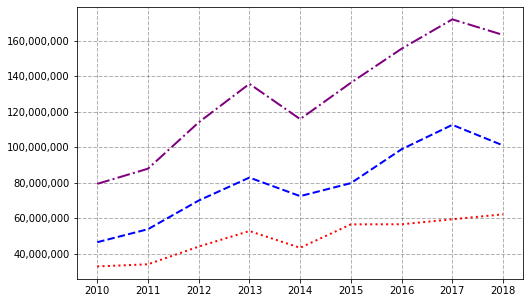

In [112]:
from matplotlib.ticker import StrMethodFormatter

dgross_avg = bom_ww_gross_df.groupby(['year'])['domestic_gross'].mean()
fgross_avg = bom_ww_gross_df.groupby(['year'])['foreign_gross'].mean()
wwgross_avg = bom_ww_gross_df.groupby(['year'])['worldwide_gross'].mean()

plt.figure(figsize=(8, 5))
plt.plot(dgross_avg.index, dgross_avg, color='red', linewidth=2.0, linestyle=':')
plt.plot(fgross_avg.index, fgross_avg, color='blue', linewidth=2.0, linestyle='--')
plt.plot(wwgross_avg.index, wwgross_avg, color='purple', linewidth=2.0, linestyle='-.')
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)
plt.axes().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


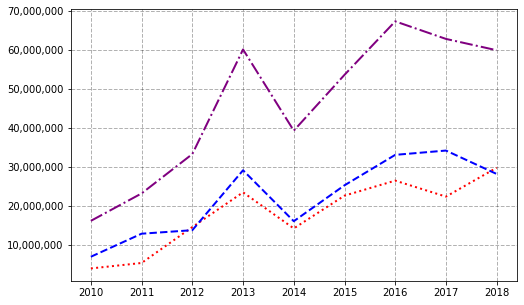

In [114]:
from matplotlib.ticker import StrMethodFormatter

dgross_median = bom_ww_gross_df.groupby(['year'])['domestic_gross'].median()
fgross_median = bom_ww_gross_df.groupby(['year'])['foreign_gross'].median()
wwgross_median = bom_ww_gross_df.groupby(['year'])['worldwide_gross'].median()

plt.figure(figsize=(8, 5))
plt.plot(dgross_median.index, dgross_median, color='red', linewidth=2.0, linestyle=':')
plt.plot(fgross_median.index, fgross_median, color='blue', linewidth=2.0, linestyle='--')
plt.plot(wwgross_median.index, wwgross_median, color='purple', linewidth=2.0, linestyle='-.')
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)
plt.axes().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()

We can tell there is a general upwards trend in all gross values over the 9 year span. There is a dip in 2014 but the gross averages and medians resume their rise. A dip appears in foreign (and worldwide) gross from 2017 to 2018 but domestic gross increased.

## What are the box office gross amounts to meet or beat? 
After examining the overall trend, let's focus on the __average__ and __median__ box office gross values for recent movies (i.e., movies released in the last 5 years).  This should give our client an idea of the numbers they will need to meet (or beat!) in order to be major players in the movie industry. 

In [115]:
#get the average gross for recent movies (i.e., movies released in the last 5 years)
bom_ww_gross_recent_df = bom_ww_gross_df.loc[bom_ww_gross_df['year'].isin([2018, 2017, 2016, 2015, 2014])]

print(bom_ww_gross_recent_df.describe())

       domestic_gross  foreign_gross     year  worldwide_gross
count          966.00         966.00   966.00           966.00
mean    54,910,633.84  91,610,597.30 2,015.86   146,521,231.14
std     93,517,688.85 150,879,414.48     1.43   226,302,484.92
min            700.00       1,010.00 2,014.00        38,300.00
25%      2,000,000.00   6,325,000.00 2,015.00    14,812,575.00
50%     21,900,000.00  26,550,000.00 2,016.00    54,900,000.00
75%     61,250,000.00 101,025,000.00 2,017.00   167,225,000.00
max    936,700,000.00 946,400,000.00 2,018.00 1,405,400,000.00


/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


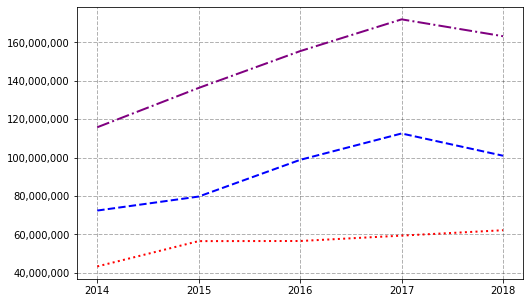

In [116]:
from matplotlib.ticker import StrMethodFormatter

dgross_recent_avg = bom_ww_gross_recent_df.groupby(['year'])['domestic_gross'].mean()
fgross_recent_avg = bom_ww_gross_recent_df.groupby(['year'])['foreign_gross'].mean()
wwgross_recent_avg = bom_ww_gross_recent_df.groupby(['year'])['worldwide_gross'].mean()

plt.figure(figsize=(8, 5))
plt.plot(dgross_recent_avg.index, dgross_recent_avg, color='red', linewidth=2.0, linestyle=':')
plt.plot(fgross_recent_avg.index, fgross_recent_avg, color='blue', linewidth=2.0, linestyle='--')
plt.plot(wwgross_recent_avg.index, wwgross_recent_avg, color='purple', linewidth=2.0, linestyle='-.')
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)
plt.xticks(wwgross_recent_avg.index)
plt.axes().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


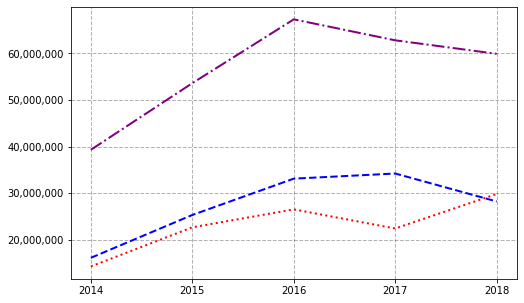

In [117]:
from matplotlib.ticker import StrMethodFormatter

dgross_recent_median = bom_ww_gross_recent_df.groupby(['year'])['domestic_gross'].median()
fgross_recent_median = bom_ww_gross_recent_df.groupby(['year'])['foreign_gross'].median()
wwgross_recent_median = bom_ww_gross_recent_df.groupby(['year'])['worldwide_gross'].median()

plt.figure(figsize=(8, 5))
plt.plot(dgross_recent_median.index, dgross_recent_median, color='red', linewidth=2.0, linestyle=':')
plt.plot(fgross_recent_median.index, fgross_recent_median, color='blue', linewidth=2.0, linestyle='--')
plt.plot(wwgross_recent_median.index, wwgross_recent_median, color='purple', linewidth=2.0, linestyle='-.')
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)
plt.xticks(wwgross_recent_avg.index)
plt.axes().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()

In [96]:
print(dgross_recent_avg)
print(fgross_recent_avg)
print(wwgross_recent_avg)
print(dgross_recent_median)
print(fgross_recent_median)
print(wwgross_recent_median)

year
2014   43,367,451.28
2015   56,551,941.56
2016   56,612,985.41
2017   59,416,764.96
2018   62,221,729.47
Name: domestic_gross, dtype: float64
year
2014    72,464,391.87
2015    79,759,770.59
2016    98,861,402.60
2017   112,592,841.85
2018   101,008,616.01
Name: foreign_gross, dtype: float64
year
2014   115,831,843.15
2015   136,311,712.15
2016   155,474,388.01
2017   172,009,606.81
2018   163,230,345.48
Name: worldwide_gross, dtype: float64
year
2014   14,250,000.00
2015   22,650,000.00
2016   26,500,000.00
2017   22,400,000.00
2018   29,800,000.00
Name: domestic_gross, dtype: float64
year
2014   16,100,000.00
2015   25,300,000.00
2016   33,100,000.00
2017   34,200,000.00
2018   28,200,000.00
Name: foreign_gross, dtype: float64
year
2014   39,300,000.00
2015   53,600,000.00
2016   67,300,000.00
2017   62,800,000.00
2018   59,900,000.00
Name: worldwide_gross, dtype: float64


__CONCLUSIONS AND RECOMMENDATIONS__

# Question: Which studios are releasing top grossing movies?
Who are the major players in the current movie industry? We'll look for insight into this question by examining the Top 100 recent movies (released in the last 5 years) and see which studios released these top performing movie. These are the major player to view as worthy rivals.


In [170]:
#Get the top 100 recent movies in dataset measured by domestic gross
top_100dom_df = bom_ww_gross_recent_df.nlargest(100, 'domestic_gross')
top_100_df.head(10)

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,131.60",2015,"936,701,131.60"
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369.50",2018,"678,801,369.50"
1873,Jurassic World,Uni.,"652,300,000.00","1,019.40",2015,"652,301,019.40"
2758,Star Wars: The Last Jedi,BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00"
3082,Incredibles 2,BV,"608,600,000.00","634,200,000.00",2018,"1,242,800,000.00"
2323,Rogue One: A Star Wars Story,BV,"532,200,000.00","523,900,000.00",2016,"1,056,100,000.00"
2759,Beauty and the Beast (2017),BV,"504,000,000.00","759,500,000.00",2017,"1,263,500,000.00"
2324,Finding Dory,BV,"486,300,000.00","542,300,000.00",2016,"1,028,600,000.00"
1875,Avengers: Age of Ultron,BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"


In [172]:
#what studios made these movies?
top_100dom_binned_by_studio = top_100dom_df.groupby('studio')['title'].count()
top_100dom_binned_by_studio.sort_values(ascending=False, inplace=True)
top_100dom_binned_by_studio

studio
BV         30
WB         16
Fox        16
Uni.       15
Sony        9
Par.        8
WB (NL)     3
LGF         2
LG/S        1
Name: title, dtype: int64

Text(0, 0.5, 'Movies')

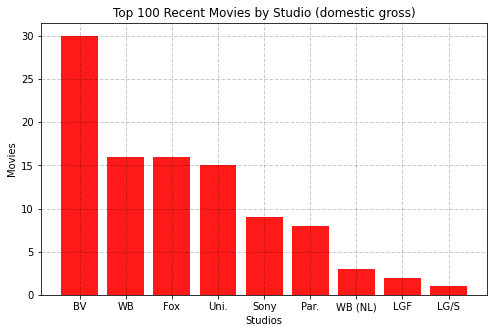

In [164]:
#viz it
fig = plt.figure(figsize = (8, 5))
plt.bar(top_100dom_binned_by_studio.index, top_100dom_binned_by_studio, color = 'red', alpha = 0.90)
plt.grid(color = 'black', alpha = 0.2, linestyle = '--', linewidth = 1)
plt.title('Top 100 Recent Movies by Studio (domestic gross)')
plt.xlabel('Studios')
plt.ylabel('Movies')

In [174]:
#Get the top 100 recent movies in dataset measured by worldwide gross
top_100ww_df = bom_ww_gross_recent_df.nlargest(100, 'worldwide_gross')
top_100_df.head(10)

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,131.60",2015,"936,701,131.60"
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369.50",2018,"678,801,369.50"
1873,Jurassic World,Uni.,"652,300,000.00","1,019.40",2015,"652,301,019.40"
2758,Star Wars: The Last Jedi,BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00"
3082,Incredibles 2,BV,"608,600,000.00","634,200,000.00",2018,"1,242,800,000.00"
2323,Rogue One: A Star Wars Story,BV,"532,200,000.00","523,900,000.00",2016,"1,056,100,000.00"
2759,Beauty and the Beast (2017),BV,"504,000,000.00","759,500,000.00",2017,"1,263,500,000.00"
2324,Finding Dory,BV,"486,300,000.00","542,300,000.00",2016,"1,028,600,000.00"
1875,Avengers: Age of Ultron,BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"


In [176]:
#what studios made these movies?
top_100ww_binned_by_studio = top_100ww_df.groupby('studio')['title'].count()
top_100ww_binned_by_studio.sort_values(ascending=False, inplace=True)
top_100ww_binned_by_studio

studio
BV         28
Fox        18
WB         16
Uni.       13
Sony        8
Par.        8
WB (NL)     4
LGF         2
WGUSA       1
LG/S        1
HC          1
Name: title, dtype: int64

Text(0, 0.5, 'Movies')

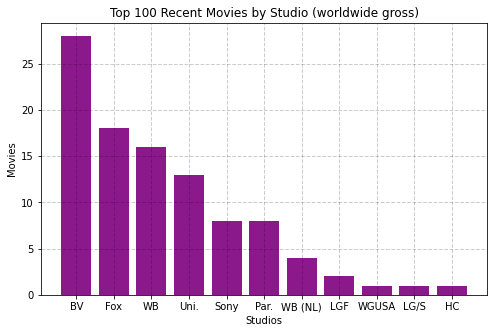

In [177]:
#viz it for top 100 ww
fig = plt.figure(figsize = (8, 5))
plt.bar(top_100ww_binned_by_studio.index, top_100ww_binned_by_studio, color = 'purple', alpha = 0.90)
plt.grid(color = 'black', alpha = 0.2, linestyle = '--', linewidth = 1)
plt.title('Top 100 Recent Movies by Studio (worldwide gross)')
plt.xlabel('Studios')
plt.ylabel('Movies')

Studios that released Top Domestic and Worldwide grossing movies

In [217]:
top_100dom_binned_by_studio.index.intersection(top_100ww_binned_by_studio.index)

Index(['BV', 'WB', 'Fox', 'Uni.', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'LG/S'], dtype='object', name='studio')

Studios that released Top Worldwide grossing movies that were not included in top Domestic

In [218]:
top_100ww_binned_by_studio.index.difference(top_100dom_binned_by_studio.index)

Index(['HC', 'WGUSA'], dtype='object', name='studio')

__CONCLUSIONS AND RECOMMENDATIONS__

# Distributions!

<AxesSubplot:xlabel='year'>

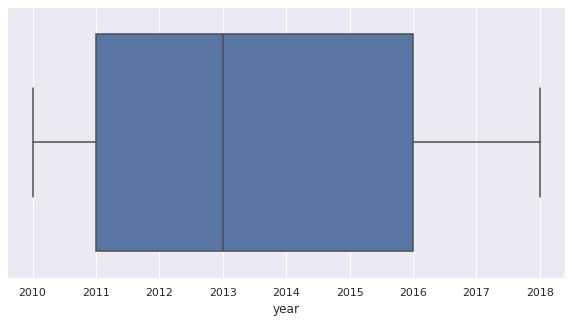

In [262]:
# distributions 
sns.set() # make it even prettier
plt.figure(figsize = (10, 5))
sns.boxplot(data = bom_ww_gross_df, x = 'year')

<AxesSubplot:xlabel='domestic_gross'>

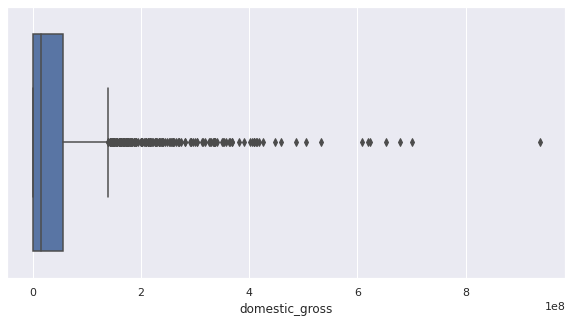

In [259]:
plt.figure(figsize = (10,5))
sns.boxplot(data = bom_ww_gross_df, x = 'domestic_gross') 

<AxesSubplot:xlabel='foreign_gross'>

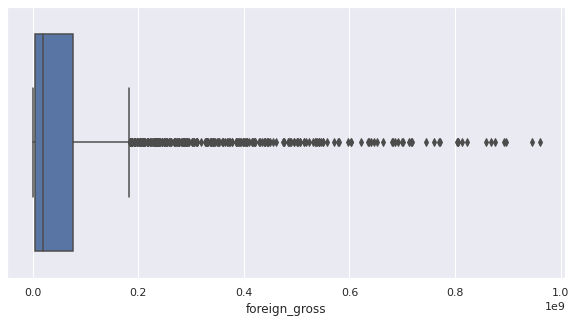

In [260]:
plt.figure(figsize = (10,5))
sns.boxplot(data = bom_ww_gross_df, x = 'foreign_gross')

<AxesSubplot:xlabel='worldwide_gross'>

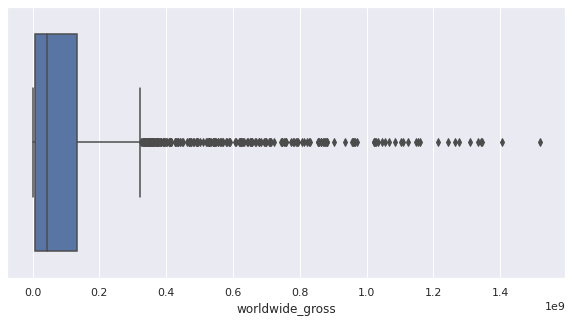

In [263]:
plt.figure(figsize = (10,5))
sns.boxplot(data = bom_ww_gross_df, x = 'worldwide_gross')

RANDOM STUFF--- I remembered how to do a scatter plot

Text(0.5, 1.0, 'y x dom gross')

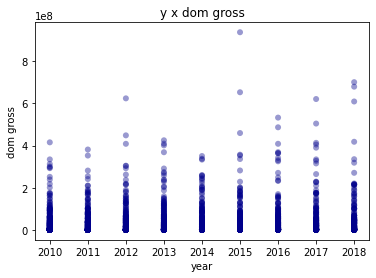

In [227]:
# scatter plot year by domestic_gross 
x_val= bom_ww_gross_df['year']
y_val= bom_ww_gross_df['domestic_gross']


fgrid = sns.scatterplot(x=x_val, y=y_val, data=bom_movie_gross_df, color='darkblue', alpha=.4, edgecolor='none')
plt.xlabel('year')
plt.ylabel('dom gross')
plt.title('y x dom gross')